In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
data = {'电影名称':['California Man','He’s Not Really into Dudes','Beautiful Woman','Kevin Longblade','Robo Slayer 3000','Amped II','?'],
        '打斗镜头':[3,2,1,101,99,98,18],
        '接吻镜头':[104,100,81,10,5,2,90],
        '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片','未知']}
movie_data = pd.DataFrame(data)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,California Man,3,104,爱情片
1,He’s Not Really into Dudes,2,100,爱情片
2,Beautiful Woman,1,81,爱情片
3,Kevin Longblade,101,10,动作片
4,Robo Slayer 3000,99,5,动作片
5,Amped II,98,2,动作片
6,?,18,90,未知


/home/apt/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25171 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/apt/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/apt/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/apt/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/apt/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/apt/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21563 mi

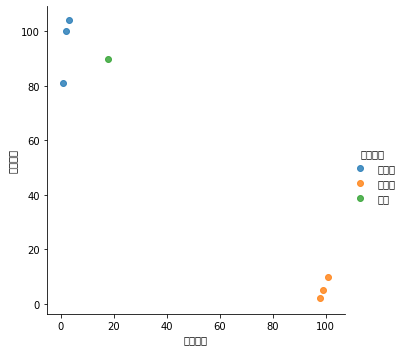

In [5]:
sns.lmplot('打斗镜头','接吻镜头',movie_data,hue='电影类型', fit_reg=False)

In [7]:
## 计算已知类别的点与当前点之间的距离
new_data=list(movie_data.loc[6][1:3])
dist = list((((movie_data.iloc[:6, 1:3] - new_data) ** 2).sum(1)) ** 0.5)
dist

[20.518284528683193,
 18.867962264113206,
 19.235384061671343,
 115.27792503337315,
 117.41379816699569,
 118.92854997854805]

In [11]:
## 将距离升序排列，然后选取距离最小的 k 个点
dist_1 = pd.DataFrame({'dist': dist, 'labels': movie_data.iloc[:6, 3]})
dr = dist_1.sort_values(by='dist')[:4]
dr

,dist,labels
1,18.867962,爱情片
2,19.235384,爱情片
0,20.518285,爱情片
3,115.277925,动作片


In [12]:
## 确定前 k 个点所在类别的出现频率
re = dr.loc[:, 'labels'].value_counts()
re

爱情片    3
动作片    1
Name: labels, dtype: int64

In [13]:
## 选择频率最高的类别作为当前点的预测类别
result = []
result.append(re.index[0])
result

['爱情片']

In [15]:
## 封装
def classify(inX, dataSet, k):
    result = []
    dist = list((((dataSet.iloc[:, 1:3] - inX) ** 2).sum(1)) ** 0.5)
    dist_1 = pd.DataFrame({'dist': dist, 'labels': dataSet.iloc[:, 3]})
    dr = dist_1.sort_values(by='dist')[: k]
    re = dr.loc[:, 'labels'].value_counts()
    result.append(re.index[0])
    return result

classify(new_data, movie_data, 4)

['爱情片']

In [17]:
## 使用sklearn实现
from sklearn.neighbors import KNeighborsClassifier
X = movie_data.iloc[:6, 1:3]
y = movie_data.iloc[:6, 3]
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X, y)
print(neigh.predict([[18, 90]]))

['爱情片']
